 # importing library

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

In [104]:
#reading data
data = pd.read_csv("Train.csv")

In [105]:
#dispay data
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [107]:
#shape of data
data.shape

(14576, 15)

In [108]:
data.User_Score .unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

In [109]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

In [110]:
data['User_Score'].dtype

dtype('O')

# checking null values

In [111]:
#checking null values
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

<AxesSubplot:>

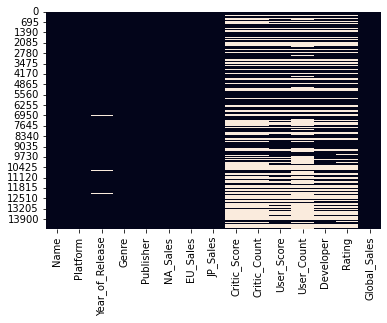

In [112]:
sns.heatmap(data.isnull(), cbar=False)

In [113]:
#droping column of nan values 
data = data.drop(["Name","Publisher","Developer","Year_of_Release","Critic_Score","Critic_Count","User_Score","User_Count","Rating"],axis=1)
data.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,41.36,28.96,3.77,82.53
1,NES,Platform,29.08,3.58,6.81,40.24
2,Wii,Racing,15.68,12.76,3.79,35.52
3,Wii,Sports,15.61,10.93,3.28,32.77
4,GB,Role-Playing,11.27,8.89,10.22,31.37


In [116]:
data.dtypes

Platform         object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Global_Sales    float64
dtype: object

In [117]:
#disply numeric features
data_numeric_fea = data.select_dtypes(include=np.number)
data_numeric_fea.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

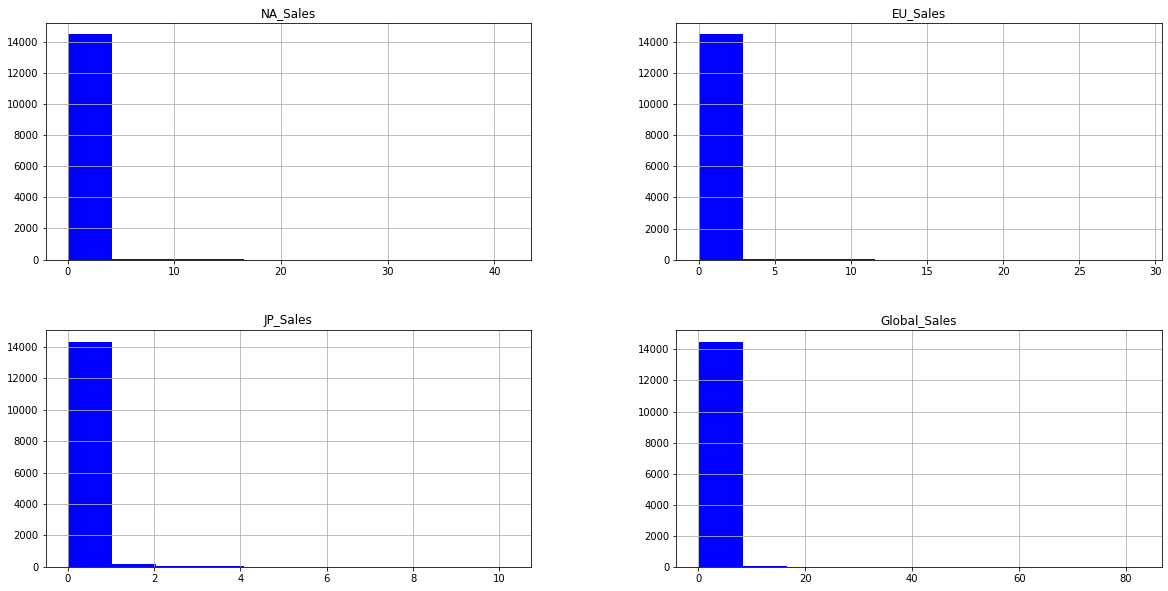

In [118]:
#ploting histogram
data.hist( color = "blue",figsize=([20,10]))
plt.show

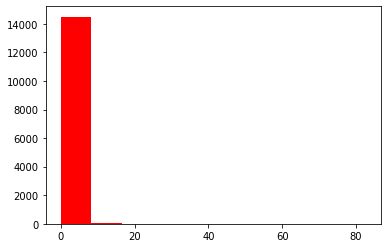

In [119]:
#ploting histogram of target
plt.hist(data["Global_Sales"], color = 'red')
plt.show()

C:\Users\Rakesh M V\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Global_Sales'>

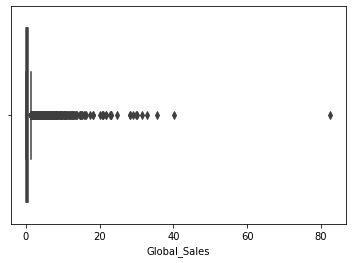

In [120]:
#ploting boxplot for checking outliers
sns.boxplot(data['Global_Sales'])

In [121]:
#removing outlier
data = data[data['Global_Sales'] < 40]
data.shape

(14574, 6)

In [122]:
data.dtypes

Platform         object
Genre            object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Global_Sales    float64
dtype: object

In [123]:
#cheching null values 
data.isnull().sum()

Platform        0
Genre           2
NA_Sales        0
EU_Sales        0
JP_Sales        0
Global_Sales    0
dtype: int64

<AxesSubplot:>

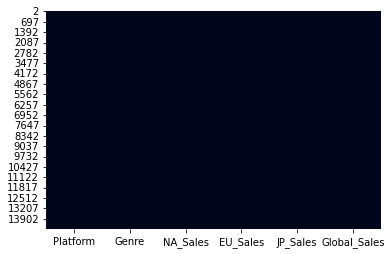

In [124]:
sns.heatmap(data.isnull(), cbar=False)

In [125]:
data.shape

(14574, 6)

<AxesSubplot:>

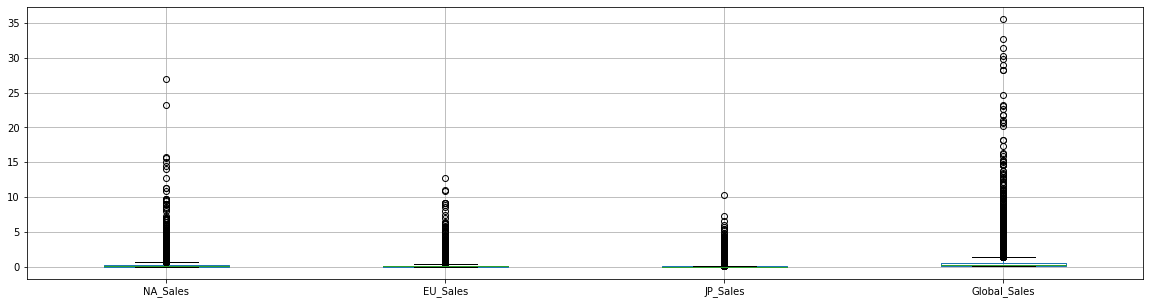

In [126]:
#ploting box plot 
data.boxplot(figsize=[20,5])

In [127]:
#checking co-relation
correlation = data.corr()
correlation

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.731564,0.422839,0.927701
EU_Sales,0.731564,1.000000,0.435561,0.888821
JP_Sales,0.422839,0.435561,1.000000,0.617421
Global_Sales,0.927701,0.888821,0.617421,1.000000


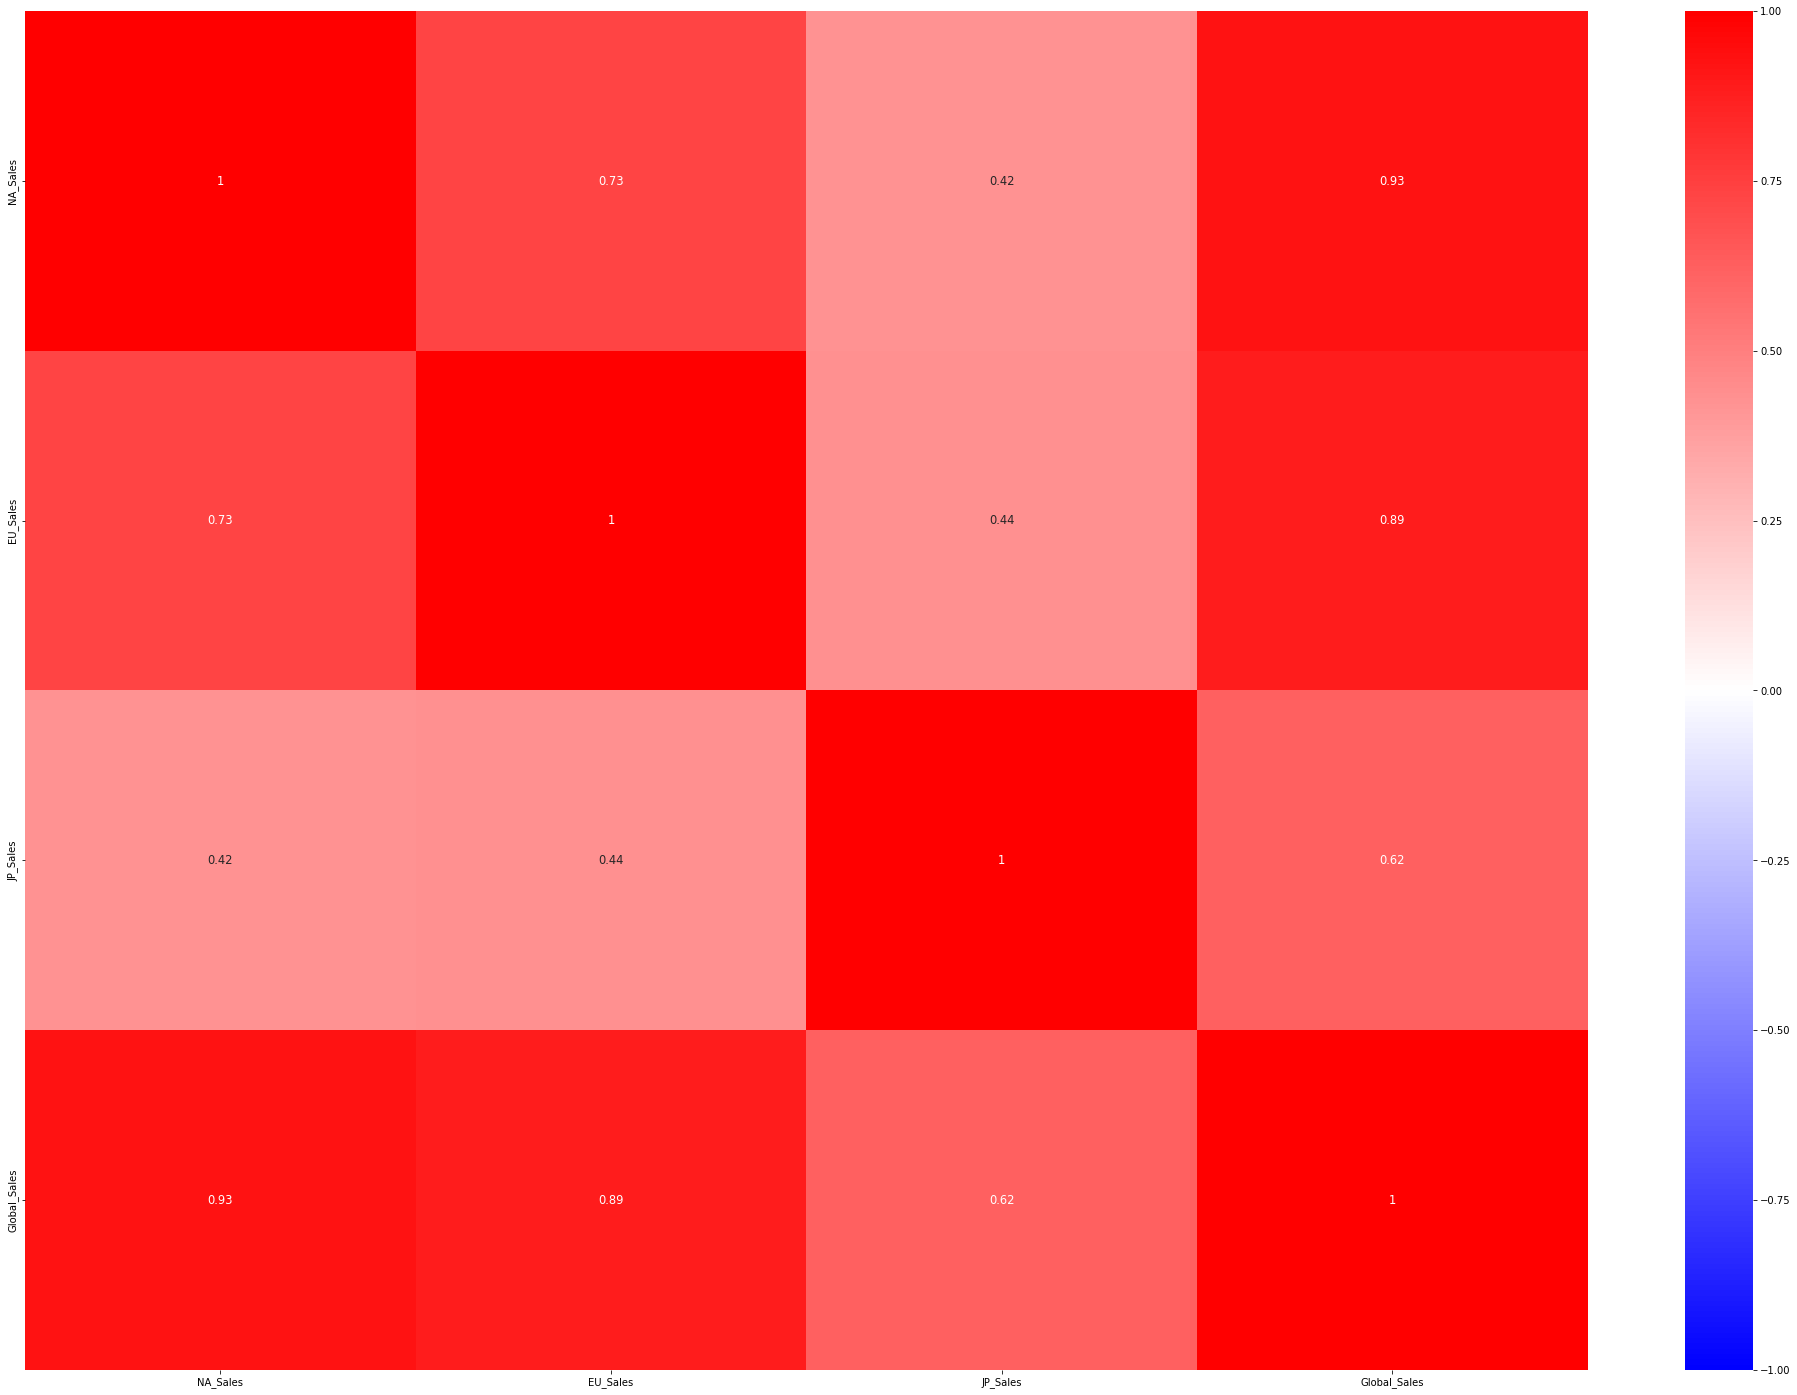

In [128]:
#plotong co-relation
plt.figure(figsize = (35,25))
sns.heatmap(correlation, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})
plt.show()

In [129]:
#desplay numeric featues
data_numeric = data.select_dtypes(include=np.number)
data_numeric.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], dtype='object')

In [130]:
#display catogoric features
data_categoric = data.select_dtypes(include = object)
data_categoric.columns

Index(['Platform', 'Genre'], dtype='object')

In [132]:
#display catogoric columns
data_categoric.columns

Index(['Platform', 'Genre'], dtype='object')

## enconding

In [133]:
#using ecoding technique
dummy_encode = pd.get_dummies(data_categoric, drop_first = True)

In [134]:
data_categoric.head()

,Platform,Genre
2,Wii,Racing
3,Wii,Sports
4,GB,Role-Playing
5,GB,Puzzle
6,DS,Platform


In [135]:
dummy_encode.head()

,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [136]:
#concatination of numeric and dummy
data_dummy = pd.concat([data_numeric, dummy_encode], axis=1)
data_dummy.head()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
2,15.68,12.76,3.79,35.52,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,15.61,10.93,3.28,32.77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,11.27,8.89,10.22,31.37,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,23.20,2.26,4.22,30.26,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6,11.28,9.14,6.50,29.80,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [194]:
#droping some rows which effect prediction
data_dummy = data_dummy.drop(['Platform_3DO','Platform_GG','Platform_PCFX','Platform_TG16','Platform_WS'],axis=1)
data_dummy


In [195]:
data_dummy.shape

(14574, 40)

In [196]:
# spliting data into test and train
X = data_dummy.drop(['Global_Sales'], axis = 1)
X = sm.add_constant(X)
y = data_dummy[['Global_Sales']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (11659, 40)
The shape of X_test is: (2915, 40)
The shape of y_train is: (11659, 1)
The shape of y_test is: (2915, 1)


# modelBuilding

In [197]:
#model fit using linear regression with ols model
linreg_ols= sm.OLS(y_train['Global_Sales'],X_train).fit()
print(linreg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.087e+04
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:59:55   Log-Likelihood:                 6333.8
No. Observations:               11659   AIC:                        -1.259e+04
Df Residuals:                   11619   BIC:                        -1.229e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0438      0

In [198]:
actual_Global_Sales = y_test['Global_Sales']

In [199]:
#pedicting using linear regression
linreg_model_predictions = linreg_ols.predict(X_test)

In [200]:
#calculating rmse,rsquare,adj rquare
linreg_ols_rmse = rmse(actual_Global_Sales, linreg_model_predictions)
linreg_ols_rsquared = linreg_ols.rsquared
linreg_ols_rsquared_adj = linreg_ols.rsquared_adj 

In [201]:
#print result in tabulation
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']
result_tabulation = pd.DataFrame(columns = cols)
linreg_ols_metrics = pd.Series({'Model': "linreg_ols ",
                     'RMSE':linreg_ols_rmse ,
                     'R-Squared': linreg_ols_rsquared,
                     'Adj. R-Squared': linreg_ols_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linreg_ols_metrics, ignore_index = True)

result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,linreg_ols,0.093638,0.990442,0.990409


In [146]:
#ols model giving less rmse

# checking perdiction for test data

In [204]:
#test data
new_data =pd.read_csv('Test.csv')

In [205]:
new_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [206]:
new_data.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [207]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


In [208]:
new_data.shape

(2143, 14)

In [209]:
new_data.User_Score.unique()

array(['7.6', nan, 'tbd', '7.1', '2.2', '3.7', '7', '8.8', '7.8', '7.4',
       '6.3', '8.7', '6.7', '6.2', '5.9', '3.8', '9', '3.2', '6', '4.2',
       '8.2', '7.2', '8.3', '9.1', '5.6', '8.5', '6.6', '7.3', '7.5',
       '6.8', '2.5', '9.2', '3.1', '5.5', '8.1', '8', '5.7', '6.4', '6.9',
       '3.5', '3.9', '1.8', '6.5', '9.4', '5', '7.7', '2.4', '8.4', '3',
       '2', '4.8', '4.7', '5.2', '1.3', '4.9', '5.8', '4.5', '7.9', '4.3',
       '4', '5.4', '8.6', '2.1', '3.4', '0.2', '8.9', '1.4', '5.1', '6.1',
       '9.3', '1.7', '5.3', '3.3', '4.1', '2.8', '4.6', '2.7', '4.4',
       '1.5', '0.9'], dtype=object)

In [210]:
new_data.shape

(2143, 14)

In [211]:
#cheching null values
new_data.isnull().sum()

Name                  0
Platform              0
Year_of_Release      37
Genre                 0
Publisher             5
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       1223
Critic_Count       1223
User_Score          888
User_Count         1349
Developer           876
Rating              897
dtype: int64

<AxesSubplot:>

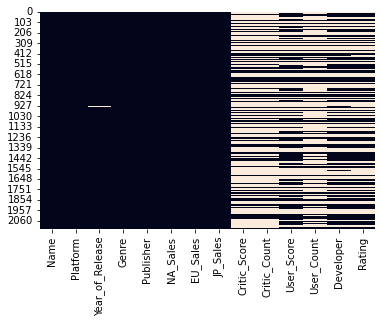

In [212]:
sns.heatmap(new_data.isnull(), cbar=False)

In [214]:
#copy the name for future to disply predicted_values
data_predict=new_data["Name"]

In [215]:
#drop column of nan values
new_data = new_data.drop(["Name","Publisher","Developer","Year_of_Release","Critic_Score","Critic_Count","User_Score","User_Count","Rating"],axis=1)
new_data.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales
0,X360,Sports,0.12,0.00,0.0
1,PS2,Fighting,0.07,0.05,0.0
2,DS,Puzzle,0.12,0.00,0.0
3,Wii,Racing,0.11,0.01,0.0
4,Wii,Puzzle,0.12,0.00,0.0


In [216]:
new_data.dtypes

Platform     object
Genre        object
NA_Sales    float64
EU_Sales    float64
JP_Sales    float64
dtype: object

In [217]:
#checking null values
new_data.isnull().sum()

Platform    0
Genre       0
NA_Sales    0
EU_Sales    0
JP_Sales    0
dtype: int64

<AxesSubplot:>

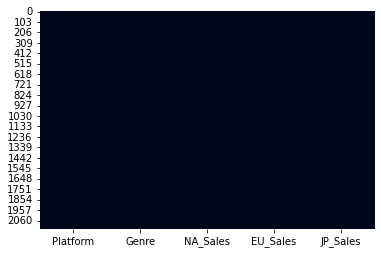

In [218]:
#ploting null value
sns.heatmap(new_data.isnull(), cbar=False)

In [219]:
new_data.shape

(2143, 5)

In [220]:
#print numeric features
new_data_numeric_fea = new_data.select_dtypes(include=np.number)
new_data_numeric_fea.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

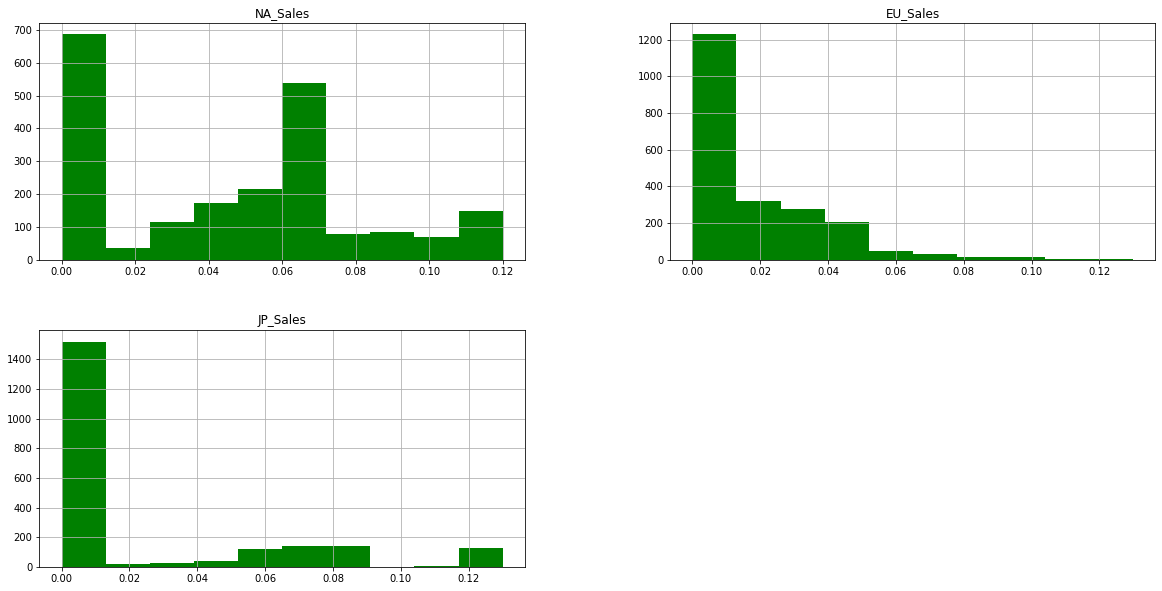

In [221]:
#plot of histogram
new_data.hist( color = "green",figsize=([20,10]))
plt.show

<AxesSubplot:>

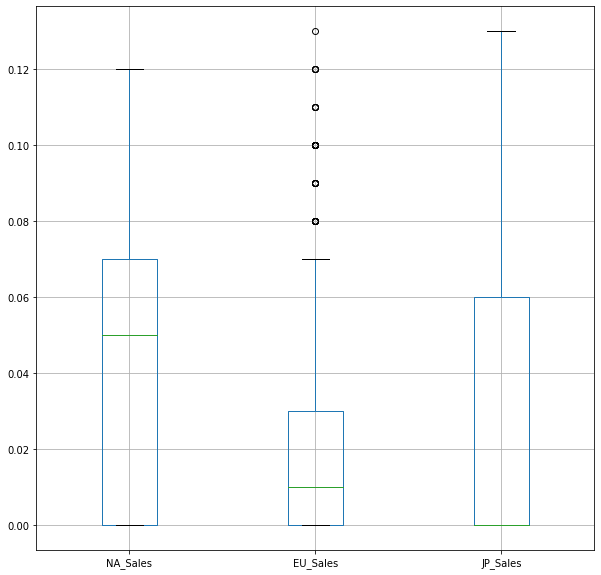

In [222]:
#plot boxplot for checking outlier
new_data.boxplot(figsize=[10,10])

In [223]:
#checking co-relation
corr = new_data.corr()
corr

,NA_Sales,EU_Sales,JP_Sales
NA_Sales,1.000000,-0.052160,-0.675859
EU_Sales,-0.052160,1.000000,-0.423567
JP_Sales,-0.675859,-0.423567,1.000000


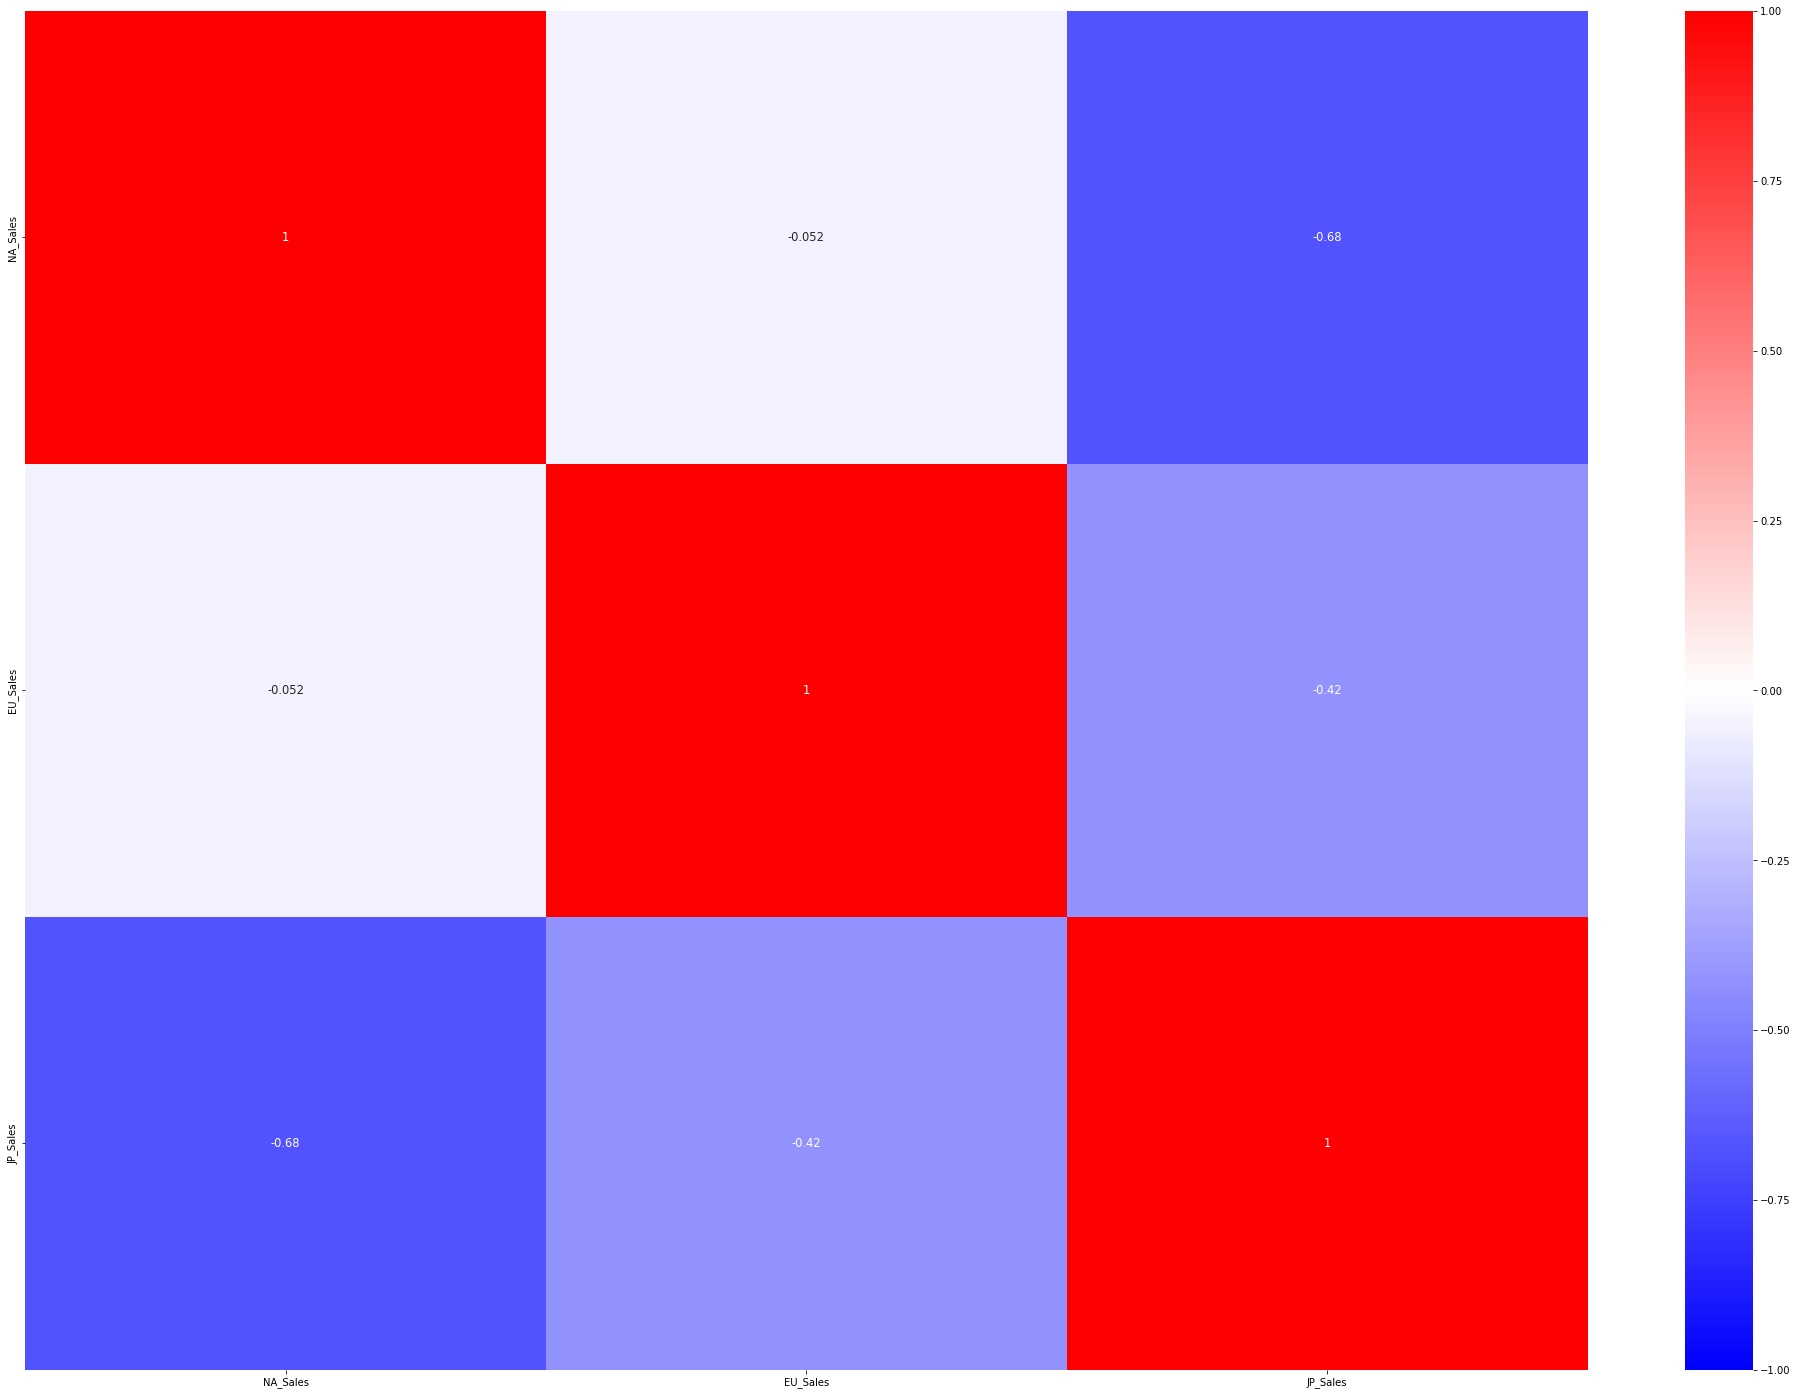

In [224]:
#plot co-relation matrix
plt.figure(figsize = (35,25))
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})
plt.show()

In [225]:
#print numeric features
new_data_numeric =new_data.select_dtypes(include=np.number)
new_data_numeric.columns

Index(['NA_Sales', 'EU_Sales', 'JP_Sales'], dtype='object')

In [226]:
#print categoric features
new_data_categoric = new_data.select_dtypes(include = object)
new_data_categoric.columns

Index(['Platform', 'Genre'], dtype='object')

In [227]:
new_data_categoric.columns

Index(['Platform', 'Genre'], dtype='object')

In [228]:
#using dummy encodimg for catogoric feature
dummy_encode = pd.get_dummies(new_data_categoric, drop_first = True)

In [229]:
dummy_encode.head()

,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_N64,Platform_NES,Platform_NG,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [230]:
#joining both dummy encoded and numeric features
new_data_dummy = pd.concat([new_data_numeric, dummy_encode], axis=1)
new_data_dummy.head()

,NA_Sales,EU_Sales,JP_Sales,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,0.12,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.07,0.05,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.12,0.00,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.11,0.01,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0.12,0.00,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [231]:
new_data_dummy.shape

(2143, 39)

In [232]:
new_data_dummy = sm.add_constant(new_data_dummy)

In [233]:
#pridiction of globle sales for test data
global_sales_predictions = linreg_ols.predict(new_data_dummy)

In [234]:
#predicted values for given test data
global_sales_predictions 

0       0.124799
1       0.178357
2       0.128989
3       0.135136
4       0.122776
          ...   
2138    0.043743
2139    0.048817
2140    0.062139
2141    0.054394
2142    0.062191
Length: 2143, dtype: float64

In [235]:
#checking type 
type(global_sales_predictions)

pandas.core.series.Series

In [236]:
#data_predict means in this iam saved name colums for displaying pedicted values in front thier names
#checking its type its in pandas.core.series
type(data_predict)

pandas.core.series.Series

In [237]:
#creating one empty dataframe
df =pd.DataFrame()


In [238]:
#joining names and pridicted_values to display the result
df = pd.concat([data_predict.reset_index(drop=True),global_sales_predictions.reset_index(drop=True)],axis=1)


In [239]:
#naming column to display in format
df.rename(columns={0:"global sales"},inplace=True)
df.rename(columns = {'Name':'name'}, inplace = True)

In [240]:
df

,name,global sales
0,Nicktoons: MLB,0.124799
1,Shonen Jump's One Piece: Grand Battle,0.178357
2,Learn Math,0.128989
3,Nitrobike,0.135136
4,Cruise Ship Vacation Games,0.122776
...,...,...
2138,Theresia...,0.043743
2139,Sacred 2: Fallen Angel,0.048817
2140,Dance Sensation!,0.062139
2141,Adventure Time: The Secret of the Nameless Kin...,0.054394


In [241]:
#converting pridicted values of final output to csv file
df.to_csv("Predicted_sales_test.csv")